# A4 (Support Vector Machines) - Arda Dinc (ad6806)

In [62]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [63]:
# Python version: 3.9.6 

# package installer UNCOMMENT IF PACKAGES ARE MISSING

# import sys
# import subprocess

# def install_package(package):
#     """Check if a package is installed, and install it if necessary."""
#     try:
#         __import__(package)
#     except ImportError:
#         print(f"Installing {package}...")
#         subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# # List of required packages with module names (some differ from pip package names)
# packages = {
#     "imbalanced-learn": "imblearn",  # Import as `imblearn`
#     "scikit-learn": "sklearn",  # Import as `sklearn`
#     "seaborn": "seaborn",
#     "yfinance": "yfinance",
#     "quandl": "quandl",  # Optional, include it only if needed
#     "graphviz": "graphviz",
#     "pandas-ta": "pandas_ta"
# }

# # Loop through and install missing packages
# for pip_name, module_name in packages.items():
#     install_package(module_name)

# # Verify Installation
# print("\nAll required packages are installed and ready to use!")



### Task 1: (30% of credit)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.

/var/folders/r6/0smcfgt9415gwpc747f7ghth0000gn/T/ipykernel_46880/3005986467.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));


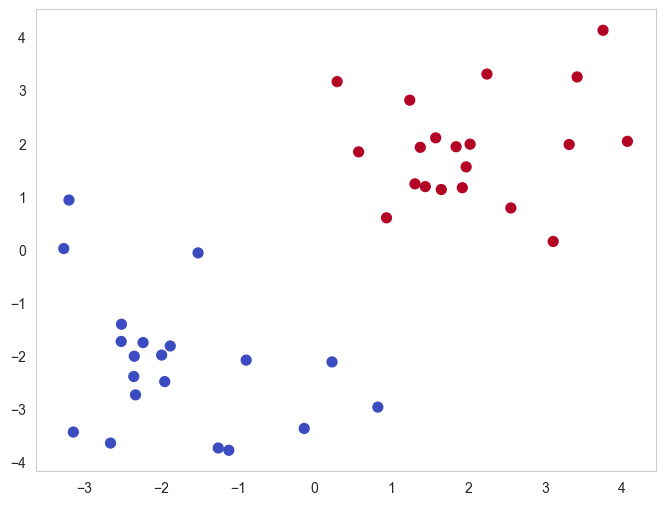

In [64]:
#Data
data1=pd.read_csv('dataset1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
rcParams['figure.figsize'] = 8, 6
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#### Solution:

1.
(a).

In [65]:
import pandas as pd

# Load dataset1.csv
df = pd.read_csv('dataset1.csv')
# Assume the last column is the label and the rest are features
X = df.iloc[:, :-1]   # feature columns
y = df.iloc[:, -1]    # label column

print("Dataset shape:", df.shape)
print(df.head())      # Preview the first few rows


from sklearn.svm import SVC

# Initialize SVM with linear kernel and high C (hard margin)
model = SVC(kernel='linear', C=100000)
# Train the model on the entire dataset
model.fit(X, y)

# After training:
print("Number of support vectors:", len(model.support_vectors_))
print("Support vector indices:", model.support_)

import numpy as np

# Extract the learned parameters
w = model.coef_[0]      # normal vector (weights) of the hyperplane
b = model.intercept_[0] # intercept of the hyperplane

print("Weights (w):", w)
print("Intercept (b):", b)

# Construct the hyperplane equation as a string (for 2 features for example)
if w.shape[0] == 2:
    eq = f"{w[0]:.3f} * x1 + {w[1]:.3f} * x2 + {b:.3f} = 0"
    print("Hyperplane equation:", eq)
    



Dataset shape: (40, 3)
         x1        x2  y
0 -2.515039 -1.408103  0
1 -1.952127 -2.488405  0
2 -2.354953 -2.391813  0
3 -0.135739 -3.371490  0
4  0.226275 -2.118110  0
Number of support vectors: 3
Support vector indices: [ 4 16 36]
Weights (w): [0.66329036 0.56359437]
Intercept (b): 0.04319974424940287
Hyperplane equation: 0.663 * x1 + 0.564 * x2 + 0.043 = 0


(b).

In [66]:
# Compute the margin = 2 / ||w||
norm_w = np.linalg.norm(w)
margin = 2 / norm_w
print("Margin width:", margin)

Margin width: 2.2977993504276433


(c).

In [67]:
# Get support vectors
support_vectors = model.support_vectors_
print("Support Vectors (coordinates):")
print(support_vectors)

# We can also get their labels if needed by indexing y:
support_indices = model.support_        # indices of support vectors in the original dataset
print("Support Vector indices in dataset:", support_indices)
print("Support Vector labels:", y.iloc[support_indices].values)



Support Vectors (coordinates):
[[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]
 [ 0.93564585  0.5969359 ]]
Support Vector indices in dataset: [ 4 16 36]
Support Vector labels: [0 0 1]


2.Plot

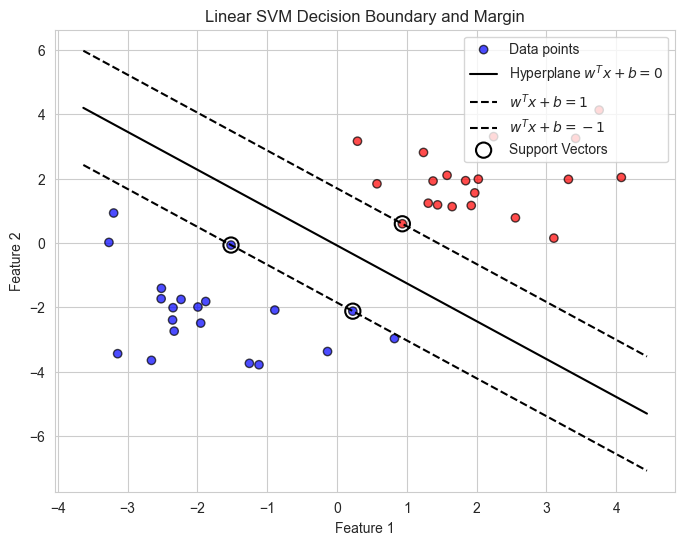

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn for a nicer style (optional)
sns.set_style('whitegrid')

# Plot the data points, coloring by class (assuming binary classification 0/1 or -1/1)
plt.figure(figsize=(8,6))
# If y is categorical, ensure it’s numeric or use hue accordingly
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap='bwr', edgecolors='k', alpha=0.7, label='Data points')

# Plot the separating hyperplane (decision boundary)
# For line plotting, get the axis limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Create a grid of x values
import numpy as np
xx = np.linspace(xlim[0], xlim[1], 200)
# For each x, solve w1*x1 + w2*x2 + b = 0 for x2 to get the line: x2 = -(w1/w2)x1 - b/w2
if w.shape[0] == 2:
    # Only plot if 2D features
    yy = -(w[0]/w[1]) * xx - b / w[1]
    plt.plot(xx, yy, 'k-', label='Hyperplane $w^T x + b = 0$')
    # Margin lines: w^T x + b = ±1
    yy_plus = -(w[0]/w[1]) * xx - (b - 1) / w[1]
    yy_minus = -(w[0]/w[1]) * xx - (b + 1) / w[1]
    plt.plot(xx, yy_plus, 'k--', label='$w^T x + b = 1$')
    plt.plot(xx, yy_minus, 'k--', label='$w^T x + b = -1$')

# Highlight support vectors
plt.scatter(support_vectors[:,0], support_vectors[:,1], 
            s=120, facecolors='none', edgecolors='k', linewidth=1.5, 
            marker='o', label='Support Vectors')  # hollow circles&#8203;:contentReference[oaicite:13]{index=13}

plt.legend(loc='best')
plt.title("Linear SVM Decision Boundary and Margin")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.


/var/folders/r6/0smcfgt9415gwpc747f7ghth0000gn/T/ipykernel_46880/529843577.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));


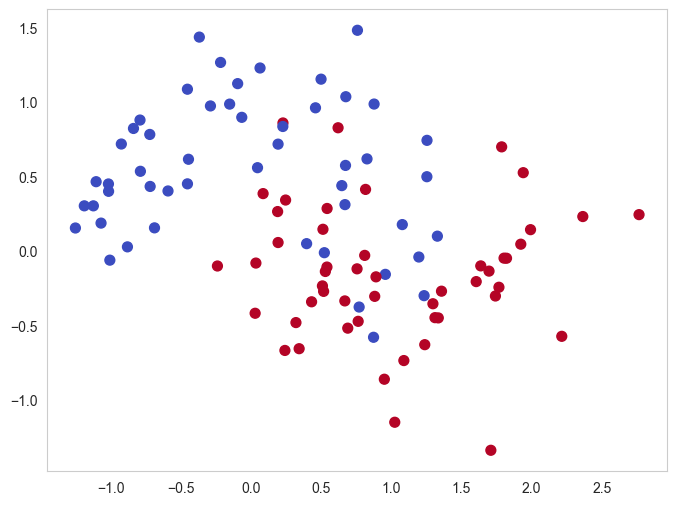

In [69]:
#Data
data2=pd.read_csv('dataset2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions:

(1)

Training Accuracy with C=0.01: 0.6136
Test Accuracy with C=0.01: 0.3939


/Users/ardadinc/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


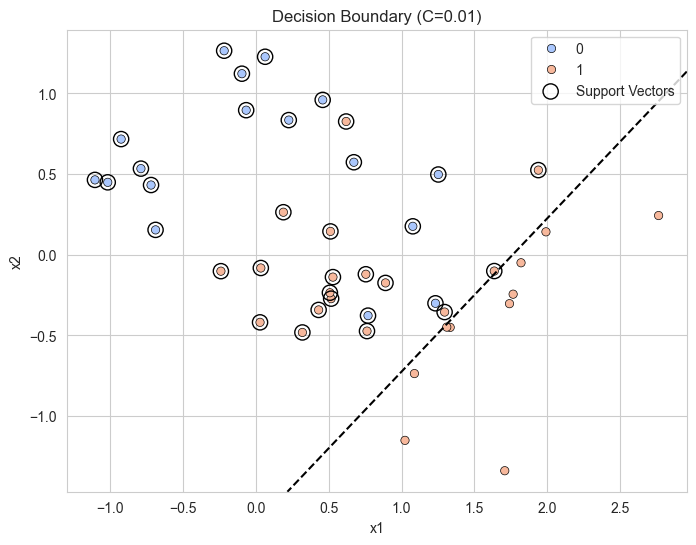

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset2.csv
data2 = pd.read_csv('dataset2.csv')

# Split into features and labels
X = data2.iloc[:, :2]   # First two columns are features
Y = data2.iloc[:, 2]    # Third column is the label

# Split into training (67%) and test (33%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

# Split training data into a smaller training set (67%) and validation set (33%)
X_train_1, X_vali, Y_train_1, Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# --- PART 1: Train SVM with C=0.01 and Evaluate Performance ---
svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(X_train_1, Y_train_1)

# Predict and compute accuracy
train_accuracy = accuracy_score(Y_train_1, svm_model.predict(X_train_1))
test_accuracy = accuracy_score(Y_test, svm_model.predict(X_test))

print(f"Training Accuracy with C=0.01: {train_accuracy:.4f}")
print(f"Test Accuracy with C=0.01: {test_accuracy:.4f}")

# Visualize Decision Boundary for C=0.01
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y, palette='coolwarm', edgecolor='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))

    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'], colors='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=120, facecolors='none', edgecolors='k', label='Support Vectors')
    
    plt.legend()
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_model, X_train_1, Y_train_1, "Decision Boundary (C=0.01)")




(2)

#### (For this question people could have different C. Any C that is bigger than 1, is a safe choice. But the corresponding accuracy should be around 0.78.) 

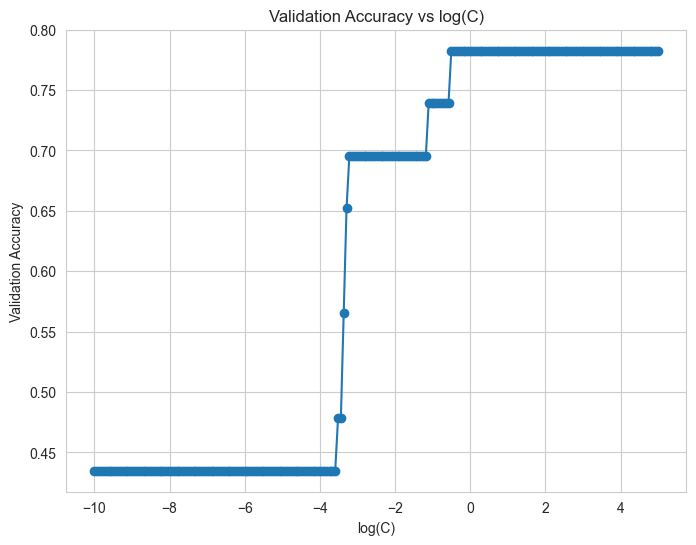

In [71]:
# --- PART 2: Tune Regularization Parameter C ---
C_values = [np.exp(i) for i in np.linspace(-10, 5, 200)]
validation_accuracies = []

for C in C_values:
    model = SVC(kernel='linear', C=C)
    model.fit(X_train_1, Y_train_1)
    val_accuracy = accuracy_score(Y_vali, model.predict(X_vali))
    validation_accuracies.append(val_accuracy)

# Plot validation accuracy vs log(C)
plt.figure(figsize=(8, 6))
plt.plot(np.log(C_values), validation_accuracies, marker='o', linestyle='-')
plt.xlabel("log(C)")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs log(C)")
plt.show()

(3)

#### (The answer could be different for people who have different optimal C. However it should be around 80 percent.)

Optimal C based on validation accuracy: 0.6050
Final Test Accuracy using Optimal C: 0.8182


/Users/ardadinc/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


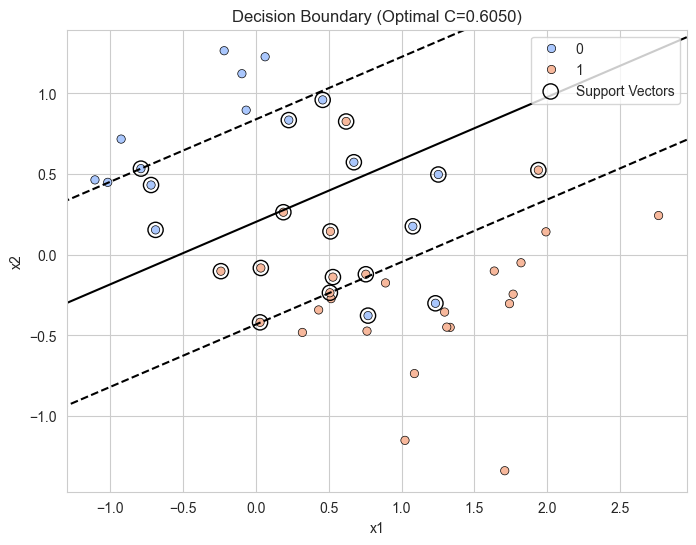

In [72]:

# --- PART 3: Select Best C and Evaluate Final Test Performance ---
optimal_C = C_values[np.argmax(validation_accuracies)]
print(f"Optimal C based on validation accuracy: {optimal_C:.4f}")

final_model = SVC(kernel='linear', C=optimal_C)
final_model.fit(X_train_1, Y_train_1)

final_test_accuracy = accuracy_score(Y_test, final_model.predict(X_test))
print(f"Final Test Accuracy using Optimal C: {final_test_accuracy:.4f}")

# Visualize final decision boundary
plot_decision_boundary(final_model, X_train_1, Y_train_1, f"Decision Boundary (Optimal C={optimal_C:.4f})")


### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


/var/folders/r6/0smcfgt9415gwpc747f7ghth0000gn/T/ipykernel_46880/2657714793.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));


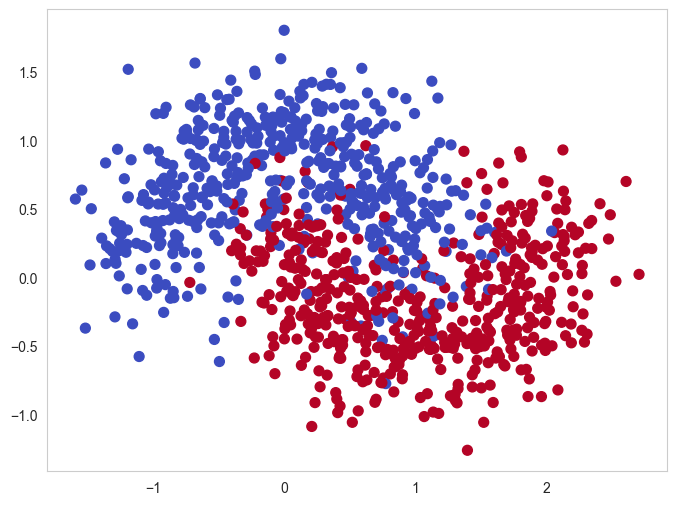

In [73]:
#Data 
data3=pd.read_csv('dataset3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions

(1)

Training Accuracy (Default SVM): 0.8567
Test Accuracy (Default SVM): 0.8667


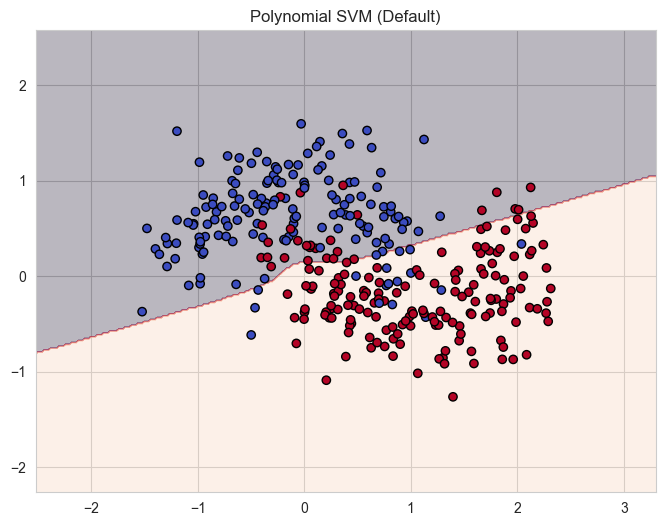

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data3 = pd.read_csv('dataset3.csv')

# Ensure correct column names
expected_columns = ['x1', 'x2', 'y']
if list(data3.columns) != expected_columns:
    data3.columns = expected_columns  # Rename only if necessary

# Extract features and labels
X = data3[['x1', 'x2']]
Y = data3['y']

# Split dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

# Split training data further into training and validation sets
X_train_1, X_vali, Y_train_1, Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# Train polynomial SVM with default parameters
default_svm = SVC(kernel='poly')
default_svm.fit(X_train, Y_train)

# Predict and evaluate on train and test sets
train_accuracy = accuracy_score(Y_train, default_svm.predict(X_train))
test_accuracy = accuracy_score(Y_test, default_svm.predict(X_test))

print(f"Training Accuracy (Default SVM): {train_accuracy:.4f}")
print(f"Test Accuracy (Default SVM): {test_accuracy:.4f}")

# Function to plot decision boundary
def plot_decision_boundary(model, X, Y, title="Decision Boundary"):
    h = 0.02
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Convert meshgrid to DataFrame to retain feature names
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_df = pd.DataFrame(grid_points, columns=X.columns)  # Keep column names

    Z = model.predict(grid_df)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.show()


# Plot decision boundary for default SVM
plot_decision_boundary(default_svm, X_test, Y_test, title="Polynomial SVM (Default)")


(2)
a.

#### Look carefully at the plot. Here the accuracy goes down when we increase log(C). If you choose optimal C in the end of the period when C reaches max as we did in class, you could have problems (might not, no garuantee). So you might have your own way of picking the optimal C, but you should have a similar OS result in next question. 

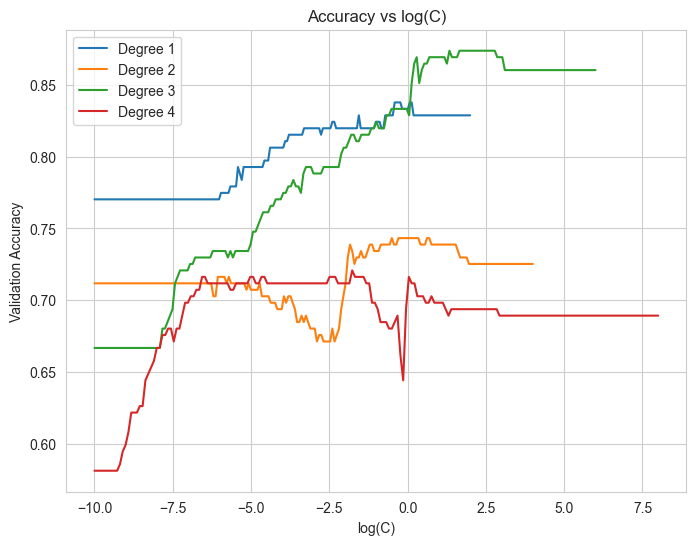

In [75]:
import math

# Define degrees to test
degrees = [1, 2, 3, 4]

# Store accuracy results
accuracy_results = {}

# Iterate over degrees
for degree in degrees:
    C_values = [math.exp(i) for i in np.linspace(-10, 2 * degree, 200)]  # Reduced for efficiency
    accuracy_scores = []
    
    for C in C_values:
        model = SVC(kernel='poly', degree=degree, C=C)
        model.fit(X_train_1, Y_train_1)
        Y_pred = model.predict(X_vali)
        accuracy = accuracy_score(Y_vali, Y_pred)
        accuracy_scores.append(accuracy)
    
    accuracy_results[degree] = (C_values, accuracy_scores)

    # Plot Accuracy vs log(C)
    plt.plot(np.log(C_values), accuracy_scores, label=f'Degree {degree}')

plt.xlabel('log(C)')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Accuracy vs log(C)')
plt.show()


(3)


Optimal Degree: 3, Optimal C: 3.806398
Final Out-of-Sample (Test) Accuracy: 0.8909


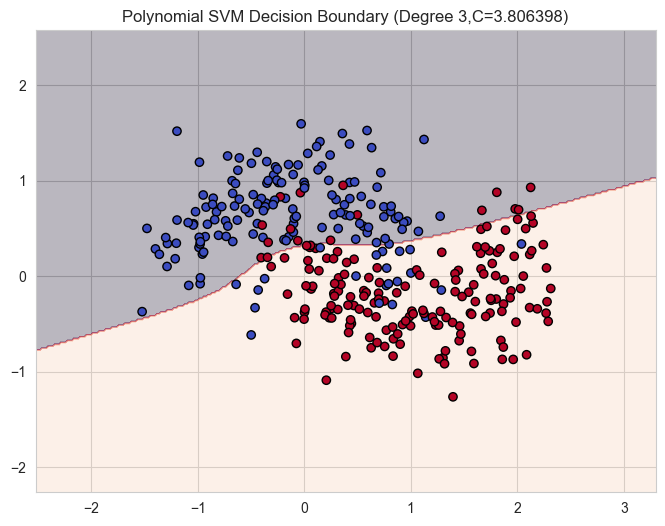

In [76]:
# Find the best degree and C
best_degree = None
best_C = None
best_accuracy = 0

for degree, (C_values, accuracy_scores) in accuracy_results.items():
    max_accuracy = max(accuracy_scores)
    best_C_for_degree = C_values[np.argmax(accuracy_scores)]
    
    if max_accuracy > best_accuracy:
        best_accuracy = max_accuracy
        best_degree = degree
        best_C = best_C_for_degree

print(f'\nOptimal Degree: {best_degree}, Optimal C: {best_C:.6f}')

# Train final model using the best degree and C
final_model = SVC(kernel='poly', degree=best_degree, C=best_C)
final_model.fit(X_train, Y_train)

# Evaluate on test set
Y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# Report final accuracy
print("=" * 50)
print(f'Final Out-of-Sample (Test) Accuracy: {test_accuracy:.4f}')
print("=" * 50)

# Plot decision boundary for final model
plot_decision_boundary(final_model, X_test, Y_test, 
                       title=f'Polynomial SVM Decision Boundary (Degree {best_degree},C={best_C:.6f})')

